## Биомедицинские нанотехнологии

### 5. Детекция объектов на основе каскадного классификатора

In [ ]:
# Cascade Classifier Training
# https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html

<div align='justify'>В данном модуле мы подробно рассмотрим использование каскадных классификаторов Хаара для обнаружения объектов на изображении. Каскадный классификатор объектов на основе признаков Хаара является одним из эффективным методом обнаружения объектов, который сравним с использованием нейронных сетей. Этот подход машинного обучения включает обучение каскадной функции на наборе положительных и негативных изображений, которая будет использована для обнаружения объектов на новых изображениях.</div>

<img width='80%' src='img/girl_haar.png'>

<div align='justify'>Мы рассмотрим этапы использования каскадного классификатора на примере распознования различных областей лица. Будут использованы обученные классификаторы из библиотеки разработчика OpenCV. Алгоритм сначала требует множества обучающих изображений, содержащих нужный объект и не содержащие его. После этого из них извлекаются признаки на основе алгоритма детекции признаков Хаара. Эти признаки аналогичны сверточному ядру и представляют собой единичные значения, получаемые вычитанием суммы пикселей под белыми прямоугольниками из суммы пикселей под черными прямоугольниками (а).</div>

<div align='center'>
<div style="float:left">
<p>(а)</p>
<img width='90%' src='img/haar_features.jpg'>
</div>
<div style="float:right">
<p>(б)</p>
<img width='90%' src='img/haar.png'>
</div>
</div>

<div align='justify'>Теперь все возможные размеры и расположения каждого ядра используются для расчета множества функций. Данная процедура достаточно требовательна к вычислительным ресурсам. Например, для окна размером 24x24 пикселя потребуется более 160 тыс. функций. Для расчета каждого объекта необходимо найти сумму пикселей под белым и черным прямоугольниками. Для решения этой проблемы были введены интегральные изображения. Каким бы ни было большое изображение, оно сокращает вычисления для каждого пикселя до операции, включающей только четыре пикселя. Среди всех этих признаков, которые были найдены, большинство из них являются бесполезными. Например, рассмотрим изображение (б). В верхнем ряду показаны два хороших признака. Первый выбранный признак, по-видимому, сконцентрирован на том свойстве, что область глаз часто темнее, чем область носа и щек. Вторая выделенная особенность основана на свойстве того, что глаза темнее переносицы. Но эти же окна, наложенные на щеки или какое-либо другое место, являются малоинформативными. Возникает вопрос, как из 160 тысяч функций выбрать нужные? Для этих целей используется алгоритм AdaBoost.</div>

<img width='80%' src='img/adaboost_new.jpg'>

<div align='justify'>В результате отбора каждый признак применяется ко всем обучающим изображениям. Для каждого признака находится наилучший порог, который позволяет классифицировать объект. При неправильной классфикации возможно возникновение ошибки. Мы выбираем те объекты, которые имеют минимальную частоту ошибок, то есть те объекты, которые позволяют наиболее точно классифицировать изображения объекта. Вначале каждому изображению назначается одинаковый вес. После каждой классификации вес неправильно классифицированных изображений увеличивается. Затем выполняется такой же процесс: рассчитываются новые коэффициенты ошибок и новые веса. Этот процесс продолжается до тех пор, пока не достигается требуемая точность, частота ошибок или необходимое количество признаков. Итоговый классификатор представляет собой взвешенную сумму этих слабых классификаторов. Его называют слабым, потому что он сам по себе не может классифицировать изображение, но вместе с другими образует сильный классификатор. В документе говорится, что даже 200 функций обеспечивают обнаружение с точностью 95%.</div>

<div align='justify'><b>Примечанеи</b>: подробнее об алгоритме каскадной классификации можно прочитать на сайте разработчика библиотеки OpenCV.</div>

In [ ]:
# Объяснение реализации каскадной классификации объектов на изображении с использованием функций Хаара
# https://scmax.ru/articles/223115/

### 5.1. Использование классификаторов Хаара для распознования лиц на изображении

In [2]:
# Классификаторы Хаара
# https://github.com/opencv/opencv/tree/4.x/data/haarcascades

<div align='justify'>В качестве тестовой задачи рассмотрим популярный алгоритм распознования лиц на изображении. Для решения данной задачи будет использованы подготовленные каскады из базы разработчика библиотеки OpenCV - haarcascade_frontalface_default.xml. Для создания классификатора используем класс CascadeClassifier(). Детекция лиц выполняется на основе метода detectMultiScale(), параметры scaleFactor=1.2 и minNeighbors=8.</div>

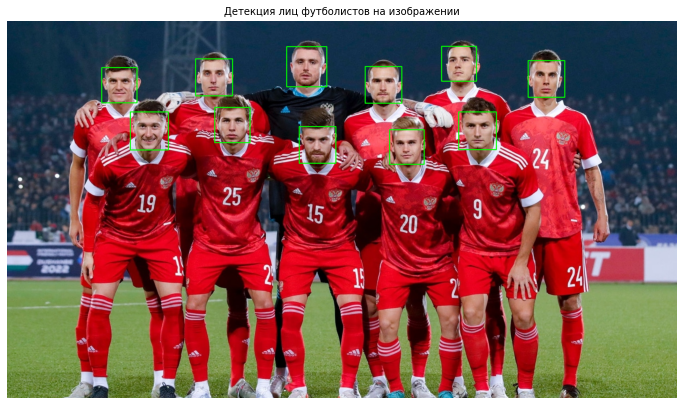

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
  
# Загрузка и чтение изображения из заданной директории
img = cv.imread('img/russian_team.jpg') 
  
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)    # Преобразование из BGR в RGB
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)  # Преобразование из BGR в GRAY

# Загрузка XML-файла классификатора Хаара
haar_cascade = cv.CascadeClassifier('data/lab_5/haar_cascade/haarcascade_frontalface_default.xml') 
  
# Применение метода обнаружения лиц к изображению в оттенках серого
faces_rect = haar_cascade.detectMultiScale(img_gray, 1.2, 8) 
  
# Отрисовка прямоугольной области найденных лиц
for (x, y, w, h) in faces_rect: 
    cv.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2) 

# Визуализация изображения
fig = plt.figure(figsize=(12, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Детекция лиц футболистов на изображении', size=10)
ax.imshow(img_rgb)
ax.axis('off')

plt.show()

### 5.2. Использование классификаторов Хаара для распознования клеток лейкоцитов

<div align='justify'>Следующий пример показывает возможность использования заранее подготовленного каскада для распознования клеток лейкоцитов. Был подготовлен файл haarcascade_neutrophils.xml, позволяющий найти лейкоциты на тестовых изображениях. Для создания классификатора используем класс CascadeClassifier(). Детекция клеток выполняется на основе метода detectMultiScale(), параметры scaleFactor=1.1 и minNeighbors=9.</div></div>

In [2]:
import cv2 as cv
import matplotlib.pyplot as plt
  
import cv2 as cv
  
# Чтение изображения
img_1 = cv.imread('data/lab_5/rand_cells_1.jpg')
img_2 = cv.imread('data/lab_5/rand_cells_2.jpg') 
img_3 = cv.imread('data/lab_5/rand_cells_3.jpg') 
  
# Преобразование в оттенки серого
gray_img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2GRAY)
gray_img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2GRAY)
gray_img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2GRAY) 
  
# Загрузка требуемого файла xml-классификатора haar-cascade
haar_cascade = cv.CascadeClassifier('data/lab_5/haar_cascade/haarcascade_neutrophils.xml') 
  
# Применение метода распознавания объекта на изображении в оттенках серого
img_1_rect = haar_cascade.detectMultiScale(gray_img_1, 1.1, 9)
img_2_rect = haar_cascade.detectMultiScale(gray_img_2, 1.1, 9)
img_3_rect = haar_cascade.detectMultiScale(gray_img_3, 1.1, 9)
  
# Отрисовка прямоугольника для найденного объекта
for (x, y, w, h) in img_1_rect: 
    cv.rectangle(img_1, (x, y), (x+w, y+h), (0, 255, 0), 2) 
    
for (x, y, w, h) in img_2_rect: 
    cv.rectangle(img_2, (x, y), (x+w, y+h), (0, 255, 0), 2) 

for (x, y, w, h) in img_3_rect: 
    cv.rectangle(img_3, (x, y), (x+w, y+h), (0, 255, 0), 2)

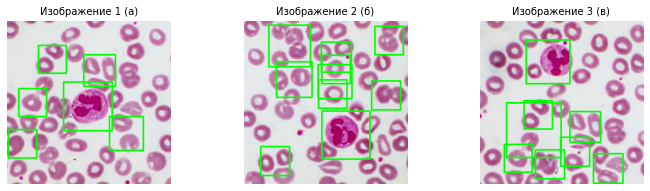

In [3]:
fig = plt.figure(figsize=(12, 3))

ax = fig.add_subplot(1, 3, 1)
ax.set_title('Изображение 1 (а)', size=10)
ax.imshow(img_1)
ax.axis('off')

ax = fig.add_subplot(1, 3, 2)
ax.set_title('Изображение 2 (б)', size=10)
ax.imshow(img_2)
ax.axis('off')

ax = fig.add_subplot(1, 3, 3)
ax.set_title('Изображение 3 (в)', size=10)
ax.imshow(img_3)
ax.axis('off')

plt.show()

<div align='justify'>На изображениях а-в видно, что классификатор определил нахождение клеток лейкоцитов на изображении. Проблема заключается в том, что дополнительно классификатор определил много побочных объектов. Задачу исключения лишних объектов предлагается решить в практической части данного модуля.</div>

### 5.3. Создание собственного каскадного классификатора Хаара

In [ ]:
# Linux -> https://coding-robin.de/2013/07/22/train-your-own-opencv-haar-classifier.html
# Windows -> https://learncodebygaming.com/blog/training-a-cascade-classifier

# Файлы проекта https://disk.yandex.ru/d/Yugsf3x3d4fyag

<div align='justify'>При решении задач распознования объектов можно воспользоваться уже обученными классификаторами. А как быть в ситуации, когда необходимо выполнить задачу детекции объекта, для которого нет обученного классификатора? Его можно создать самому. Далее будут рассмотрены этапы создания собственного классификатора.</div>

<div align='justify'>В архиве к данному модулю можно найти уже подготовленные шаблоны изображений (в папке positive_img и negative_img). Данные изображения необходимы для получения информации о таргете и фоновом изображении. Для начала обучения классификатора требуется подготовить 60-100 экземпляров положительных изображений (таргет). Изображения должны быть строго сегментированы, ничего лишнего на изображении быть не должно. Для фоновых изображений нужно создать около 1000 экземпляторов. Требования к фону менее строгие. Для получения фона можно воспользоваться программой для аугментации изображений. Например:</div>

In [ ]:
import Augmentor

# Генерации 1000 изображений по шаблону
p = Augmentor.Pipeline("data/<файл шаблона>")
p.rotate(probability=0.8, max_left_rotation=20, max_right_rotation=10)
p.zoom(probability=0.4, min_factor=1.1, max_factor=1.8)
p.sample(1000)

### Примеры положительных и отрицательных изображений:

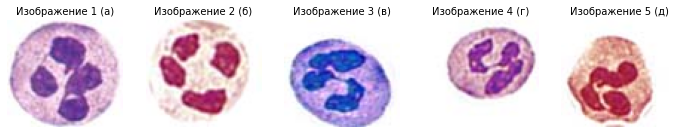

In [7]:
# Чтение изображения
img_1 = cv.imread('data/lab_5/positive_img/1.jpg')
img_2 = cv.imread('data/lab_5/positive_img/40.jpg') 
img_3 = cv.imread('data/lab_5/positive_img/66.jpg') 
img_4 = cv.imread('data/lab_5/positive_img/79.jpg') 
img_5 = cv.imread('data/lab_5/positive_img/92.jpg') 
  
# Преобразование из BGR -> RGB
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_4 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 3))

img = [img_1, img_2, img_3, img_4, img_5]
label = ['а', 'б', 'в', 'г', 'д']

for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.set_title(f'Изображение {i+1} ({label[i]})', size=10)
    ax.imshow(img[i])
    ax.axis('off')

plt.show()

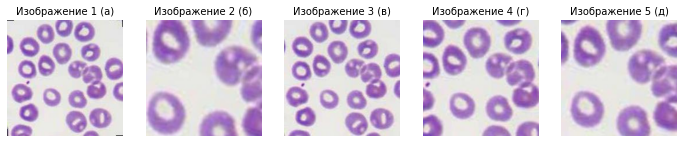

In [6]:
# Чтение изображения
img_1 = cv.imread('data/lab_5/negative_img/1.jpg')
img_2 = cv.imread('data/lab_5/negative_img/15.jpg') 
img_3 = cv.imread('data/lab_5/negative_img/38.jpg') 
img_4 = cv.imread('data/lab_5/negative_img/39.jpg') 
img_5 = cv.imread('data/lab_5/negative_img/59.jpg') 
  
# Преобразование из BGR -> RGB
img_1 = cv.cvtColor(img_1, cv.COLOR_BGR2RGB)
img_2 = cv.cvtColor(img_2, cv.COLOR_BGR2RGB)
img_3 = cv.cvtColor(img_3, cv.COLOR_BGR2RGB)
img_4 = cv.cvtColor(img_4, cv.COLOR_BGR2RGB)
img_5 = cv.cvtColor(img_5, cv.COLOR_BGR2RGB)

fig = plt.figure(figsize=(12, 3))

img = [img_1, img_2, img_3, img_4, img_5]
label = ['а', 'б', 'в', 'г', 'д']

for i in range(5):
    ax = fig.add_subplot(1, 5, i+1)
    ax.set_title(f'Изображение {i+1} ({label[i]})', size=10)
    ax.imshow(img[i])
    ax.axis('off')

plt.show()

### 1. Создание файла neg.txt 

In [44]:
# Создание neg.txt

# Чтение всех файлов в папке /negative и генерирация файла neg.txt
def generate_negative_description_file():
    with open('neg.txt', 'w') as f:
        # Необходимо указать директорию с отрицательными изображениями
        for filename in os.listdir('negative'):
            f.write('negative/' + filename + '\n')

### 2. Создание файла pos.txt

In [ ]:
# Создание pos.txt - используем утилиту из архива opencv_annotation.exe

$ C:/opencv/opencv/build/x64/vc15/bin/opencv_annotation.exe --annotations=pos.txt --images=positive_img/

### 3. Создание файла pos.vec

In [ ]:
# Создание pos.vec - используем утилиту из архива opencv_createsamples.exe

$ C:/opencv/opencv/build/x64/vc15/bin/opencv_createsamples.exe -info pos.txt -w 50 -h 50 -num 100 -vec pos.vec

### 4. Создание каскада Хаара

In [ ]:
# Создание *.xml - используем утилиту из архива  opencv_traincascade.exe

$ C:/opencv/opencv/build/x64/vc15/bin/opencv_traincascade.exe -data cascade/ -vec pos.vec -bg neg.txt -numPos 100 -numNeg 1000 -numStages 10 -w 50 -h 50

### Задание для самостоятельной работы.

1. Объясните, в чём заключается принцип обучения классификатора на основе функции Хаара. Какие методы в библиотеке OpenCV используются для детекции объектов на изображении на основе каскадного классификатора.

2. Какие базовые обученные классификаторы в библиотеке OpenCV вам известны. Как можно создать собственный классификатор на основе функции Хаара.

3. Используя данные и классификатор haarcascade_neutrophils.xml из п.п. 5.2 данного модуля, определите на тестовых изображениях (rand_cells_1/2/3.jpg) только клетки лейкоцитов. Все остальные элементы крови можно считать шумом. Для лучшего  распознования объектов, например, можно воспользоваться настройкой параметров метода detectMultiScale() и использовать фильтрацию на основе размера найденного объекта.

4. *Попробуйте самостоятельно создать классификатор для распознования объекта на изображении. Для создания положительного изображения можно воспользоваться изображением cells.jpg. Использовать изображение лимфоцита, моноцита или другого элемента крови.